In [1]:
import json
import os
import importlib
from IPython.display import display
import numpy as np
np.set_printoptions(threshold=20)

In [2]:
import cmdbench

In [3]:
benchmark_results = cmdbench.benchmark_command("node --expose-gc test.js", iterations_num = 10, raw_data = False)

In [4]:
# Get the benchmark results for the first iteration
benchmark_results.get_single_iteration()

{
  'cpu': {
    'system_time': 1.7799999999999998,
    'total_time': 25.69,
    'user_time': 23.91,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 1407040,
    'total_bytes': 1310720,
    'total_chars': 2719047,
    'write_bytes': 1310720,
    'write_chars': 1312007,
  },
  'memory': {
    'max': 4693893120,
    'max_perprocess': 629190656,
  },
  'process': {
    'execution_time': 6.346,
    'stderr_data': '',
    'stdout_data': 'Running master process\n\nRunning child process
                    #1\n\nRunning child process #3\n\nRunning child process
                    ...(4 hidden lines)',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 163.3,   0. , ...,   0. ,   0. ,   0. ])
    'memory_bytes': array([ 26144768,  27799552,  28950528, ..., 158146560,  79122432,
        54927360])
    'sample_milliseconds': array([   1,    7,   13, ..., 6327, 6332, 6338])
  },
}

In [5]:
# Get the benchmark results for the average of all kinds of resources, including time series data
benchmark_results.get_averages()

{
  'cpu': {
    'system_time': 1.807,
    'total_time': 25.378,
    'user_time': 23.570999999999998,
  },
  'disk': {
    'read_bytes': 0.0,
    'read_chars': 1407035.2,
    'total_bytes': 1310720.0,
    'total_chars': 2719037.4,
    'write_bytes': 1310720.0,
    'write_chars': 1312002.2,
  },
  'memory': {
    'max': 4722668339.2,
    'max_perprocess': 629117337.6,
  },
  'process': {
    'execution_time': 6.3666,
    'stderr_data': None,
    'stdout_data': None,
  },
  'time_series': {
    'cpu_percentages': array([ 59.25294118,  50.59230769, 181.61      , ...,   0.        ,
         0.        ,   0.        ])
    'memory_bytes': array([2.63131859e+07, 2.85097354e+07, 2.98823680e+07, ...,
       1.57057024e+08, 1.21020416e+08, 7.86350080e+07])
    'sample_milliseconds': array([3.58823529e+00, 1.17692308e+01, 1.83000000e+01, ...,
       6.44350000e+03, 6.45200000e+03, 6.45700000e+03])
  },
}

In [6]:
# Get statistics for all of the resources over iterations
benchmark_results.get_statistics()

{
  'cpu': {
    'system_time': (mean: 1.807, stdev: 0.05899999999999999, min: 1.7200000000000002, max: 1.9100000000000001)
    'total_time': (mean: 25.378, stdev: 0.38062580049176925, min: 24.7, max: 25.93)
    'user_time': (mean: 23.570999999999998, stdev: 0.3497270364155451, min: 22.98, max: 24.07)
  },
  'disk': {
    'read_bytes': (mean: 0.0, stdev: 0.0, min: 0, max: 0)
    'read_chars': (mean: 1407035.2, stdev: 5.30659966456864, min: 1407024, max: 1407040)
    'total_bytes': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
    'total_chars': (mean: 2719037.4, stdev: 10.61319932913728, min: 2719015, max: 2719047)
    'write_bytes': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
    'write_chars': (mean: 1312002.2, stdev: 5.30659966456864, min: 1311991, max: 1312007)
  },
  'memory': {
    'max': (mean: 4722668339.2, stdev: 99035863.37127185, min: 4575125504, max: 4906184704)
    'max_perprocess': (mean: 629117337.6, stdev: 78113.41553817756, min: 628989952, max

In [7]:
# Get the plot for resources (Ram + CPU)
fig = benchmark_results.get_resources_plot(width = 15, height = 3)

In [8]:
# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

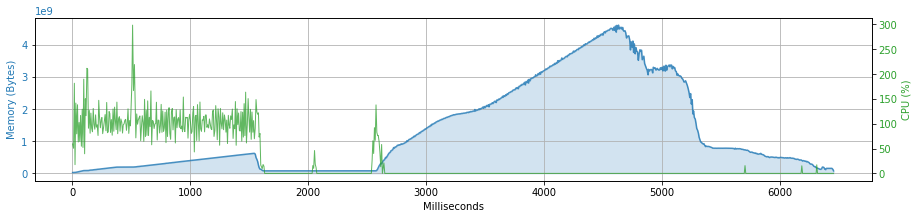

In [9]:
%matplotlib inline
# Show the plot in ipython
display(fig)

In [10]:
print("Average runtime: %s seconds" % benchmark_results.get_averages().process.execution_time)

Average runtime: 6.3666 seconds


In [11]:
# Get lists for accurate values of different kinds of resources over iterations
benchmark_results.get_values_per_attribute()

{
  'cpu': {
    'system_time': [1.7799999999999998, 1.8199999999999998, 1.85, 1.8499999999999999, 1.9100000000000001, 1.75, 1.7999999999999998, 1.8599999999999999, 1.73, 1.7200000000000002],
    'total_time': [25.69, 25.479999999999997, 25.2, 25.590000000000003, 25.66, 25.619999999999997, 24.91, 25.93, 25.0, 24.7],
    'user_time': [23.91, 23.659999999999997, 23.349999999999998, 23.740000000000002, 23.75, 23.869999999999997, 23.11, 24.07, 23.27, 22.98],
  },
  'disk': {
    'read_bytes': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'read_chars': [1407040, 1407032, 1407040, 1407040, 1407040, 1407032, 1407040, 1407032, 1407032, 1407024],
    'total_bytes': [1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720],
    'total_chars': [2719047, 2719031, 2719047, 2719047, 2719047, 2719031, 2719047, 2719031, 2719031, 2719015],
    'write_bytes': [1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720],
    'write_chars': [1312007, 13